In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [125]:
df = pd.read_csv('datasets_906_1654_loan_data.csv')
df.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [126]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [127]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


No handles with labels found to put in legend.


Text(0.5, 0, 'FICO')

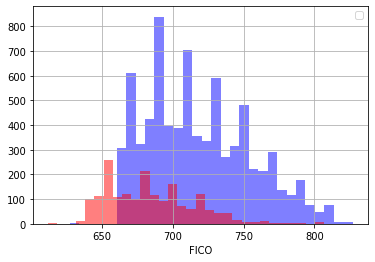

In [128]:
plt.figure()
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30)
label='Credit Policy = 1'
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30)
label='Credit Policy = 0'
plt.legend()
plt.xlabel('FICO')

No handles with labels found to put in legend.


Text(0.5, 0, 'fico')

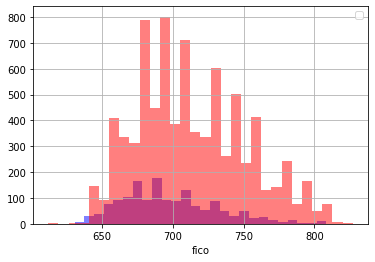

In [129]:
plt.figure()
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30)
label= 'Not Fully paid = 1'
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', bins=30)
label= 'Not fully paid = 1'
plt.legend()
plt.xlabel('fico')

In [130]:
cat_features=['purpose']

In [131]:
final_data = pd.get_dummies(df,columns=cat_features,drop_first=True)

In [132]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [133]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
import scikitplot as skplt
from sklearn.metrics import confusion_matrix,classification_report

In [134]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state= 0) 

In [135]:
dt_model = DecisionTreeClassifier(max_leaf_nodes= 250, random_state=1)

In [136]:
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_valid)
dt_mae = mean_absolute_error(dt_predictions, y_valid)

print(f'Mean Absolute Error for Decision Tree is {dt_mae}\n')
print(classification_report(y_valid,dt_predictions))

Mean Absolute Error for Decision Tree is 0.20615866388308976

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3219
           1       0.26      0.16      0.20       613

    accuracy                           0.79      3832
   macro avg       0.56      0.54      0.54      3832
weighted avg       0.76      0.79      0.77      3832



In [137]:
print(confusion_matrix(y_valid,dt_predictions))

[[2943  276]
 [ 514   99]]


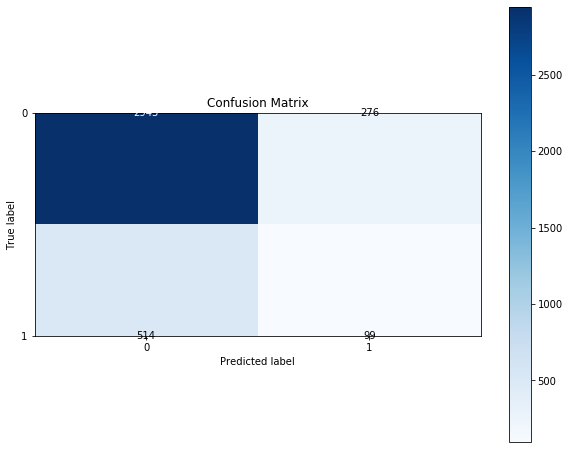

In [138]:
skplt.metrics.plot_confusion_matrix(y_valid,dt_predictions, figsize = (10,8))

In [139]:
rf_model = RandomForestClassifier(n_estimators = 250, random_state = 1)

In [140]:
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_valid)
rf_mae = mean_absolute_error(rf_predict, y_valid)
print(f'Mean Absolute Error for Random Forest Tree is {rf_mae}\n')
print(classification_report(y_valid,rf_predict))

Mean Absolute Error for Random Forest Tree is 0.16205636743215032

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3219
           1       0.39      0.02      0.04       613

    accuracy                           0.84      3832
   macro avg       0.62      0.51      0.48      3832
weighted avg       0.77      0.84      0.77      3832



In [141]:
print(confusion_matrix(y_valid,rf_predict))

[[3197   22]
 [ 599   14]]


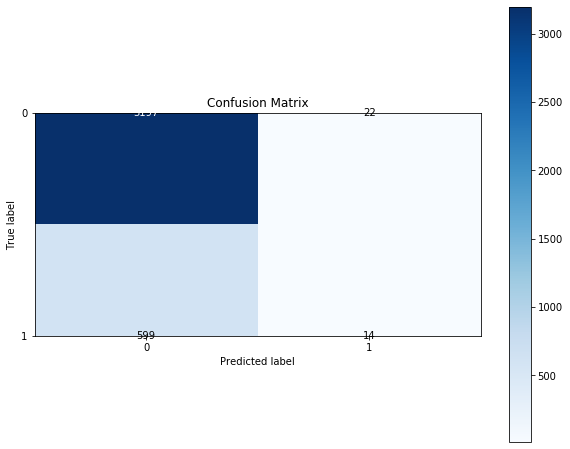

In [142]:
skplt.metrics.plot_confusion_matrix(y_valid,rf_predict, figsize = (10,8))

In [143]:
#Precision: When loans are predicted to be bad they are bad 84% of the time 
#Recall: Of all the true bad-loans, this model identified 99% of them
#F1-score: The harmonic-mean of the Precision ​ and Recall, 91% for bad loan